In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [24]:
gdp_df = pd.read_csv("..\data\gdp_per_capita.csv")

In [25]:
gdp_df.head(10)

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2020,1970.560169,NaN
1,Afghanistan,2019,2065.036235,NaN
2,Afghanistan,2018,2033.804389,NaN
3,Afghanistan,2017,2058.400221,NaN
4,Afghanistan,2016,2057.067978,NaN
5,Afghanistan,2015,2068.265904,NaN
6,Afghanistan,2014,2102.384604,NaN
7,Afghanistan,2013,2116.465258,NaN
8,Afghanistan,2012,2075.491614,NaN
9,Afghanistan,2011,1904.559926,NaN


In [26]:
gdp_df = gdp_df.drop('Value Footnotes', axis = 1)
gdp_df = gdp_df.rename(columns = {'Country or Area':'Country', "Year": 'Year', 'Value': 'GDP_Per_Capita' })

In [27]:
gdp_df

,Country,Year,GDP_Per_Capita
0,Afghanistan,2020,1970.560169
1,Afghanistan,2019,2065.036235
2,Afghanistan,2018,2033.804389
3,Afghanistan,2017,2058.400221
4,Afghanistan,2016,2057.067978
...,...,...,...
7171,Zimbabwe,1994,2603.927369
7172,Zimbabwe,1993,2420.092791
7173,Zimbabwe,1992,2437.152908
7174,Zimbabwe,1991,2733.696626


In [28]:
gdp_df.shape

(7176, 3)

In [29]:
gdp_df.dtypes

Country            object
Year                int64
GDP_Per_Capita    float64
dtype: object

6. There are 7176 rows and 3 columns
- Country is object column 
- Year is an integer column
- GDP_Per_Capita

In [30]:
gdp_df['Year'].value_counts()

2018    242
2017    242
2016    242
2015    242
2014    242
2013    242
2019    241
2020    240
2012    240
2011    240
2010    239
2009    239
2008    238
2007    237
2006    237
2004    236
2005    236
2003    235
2002    235
2001    234
2000    233
1999    227
1998    226
1997    226
1996    222
1995    222
1994    211
1993    209
1992    208
1991    207
1990    206
Name: Year, dtype: int64

7. This dataset represents years 1990 through 2020.
- I noticed there tends to be less values for the earlier years

In [31]:
gdp_df['Country'].nunique()

242

In [32]:
gdp_df['Country'].value_counts(ascending=True).head()

Somalia                       8
Djibouti                      8
Turks and Caicos Islands     10
Sint Maarten (Dutch part)    10
Kosovo                       13
Name: Country, dtype: int64

## Q8)
There are 242 countries
- Somalia and Djibouti are the least represented
- These countries may have data security concerns which limits them sharing economic data

In [33]:
gdp_2014 = gdp_df.query('Year == 2014').reset_index()

In [34]:
gdp_2014.describe()

,index,Year,GDP_Per_Capita
count,242.000000,242.0,242.000000
mean,3598.768595,2014.0,19612.875611
std,2074.362752,0.0,20961.714572
min,6.000000,2014.0,822.611195
25%,1793.750000,2014.0,4702.212961
50%,3620.000000,2014.0,12178.874687
75%,5402.750000,2014.0,26461.384188
max,7151.000000,2014.0,155201.740571


(array([149.,  41.,  25.,  19.,   4.,   1.,   1.,   1.,   0.,   1.]),
 array([   822.61119489,  16260.52413249,  31698.43707008,  47136.35000768,
         62574.26294527,  78012.17588287,  93450.08882046, 108888.00175806,
        124325.91469565, 139763.82763325, 155201.74057084]),
 <BarContainer object of 10 artists>)

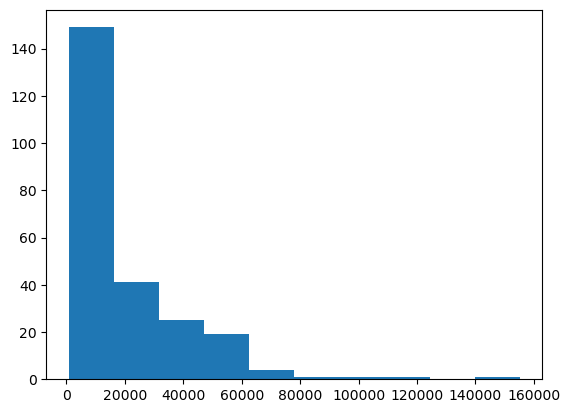

In [35]:
plt.hist(x = gdp_2014['GDP_Per_Capita'])

11. The histogram is right-skewed

In [36]:
gdp_2018 = gdp_df.query('Year == 2018').reset_index().drop(columns = 'index')

In [37]:
gdp_2018.sort_values('GDP_Per_Capita',ascending=False).head()

,Country,Year,GDP_Per_Capita
131,"Macao SAR, China",2018,132373.544079
130,Luxembourg,2018,115049.926079
192,Singapore,2018,98336.956494
180,Qatar,2018,90970.060902
102,Ireland,2018,83726.362961


In [38]:
gdp_2018.sort_values('GDP_Per_Capita',ascending=True).head()

,Country,Year,GDP_Per_Capita
30,Burundi,2018,761.524143
38,Central African Republic,2018,933.109951
51,Dem. Rep. Congo,2018,1085.893688
198,Somalia,2018,1129.531464
159,Niger,2018,1200.402348


## 12) 
 The top 5 countries are:
 1. Macao SAR, China
 2. Luxembourg
 3. Singapore
 4. Qatar
 5. Ireland

The bottom 5 countries are:
1. Burundi
2. Central African Republic
3. Dem. Rep. Congo
4. Somalia
5. Niger

In [39]:
gdp_1990_2018 = gdp_df.query('Year == 1990 or Year == 2018')
gdp_pivoted = gdp_1990_2018.pivot_table(values = 'GDP_Per_Capita',
                         index = 'Country',
                         columns = ['Year']).reset_index()
gdp_pivoted

Year,Country,1990,2018
0,Afghanistan,NaN,2033.804389
1,Africa Eastern and Southern,3083.976800,3697.317275
2,Africa Western and Central,2810.341129,4132.592996
3,Albania,4827.034551,13317.092313
4,Algeria,8746.340762,11630.679409
...,...,...,...
237,Vietnam,2066.372215,9548.700016
238,West Bank and Gaza,NaN,6318.210068
239,World,9704.621768,16679.316815
240,Zambia,2190.181724,3521.545978


In [40]:
gdp_pivoted = gdp_pivoted.dropna().reset_index()
gdp_pivoted

Year,index,Country,1990,2018
0,1,Africa Eastern and Southern,3083.976800,3697.317275
1,2,Africa Western and Central,2810.341129,4132.592996
2,3,Albania,4827.034551,13317.092313
3,4,Algeria,8746.340762,11630.679409
4,5,Angola,5758.950488,6982.129420
...,...,...,...,...
201,236,Vanuatu,2855.554643,3093.086718
202,237,Vietnam,2066.372215,9548.700016
203,239,World,9704.621768,16679.316815
204,240,Zambia,2190.181724,3521.545978


In [41]:
gdp_pivoted

Year,index,Country,1990,2018
0,1,Africa Eastern and Southern,3083.976800,3697.317275
1,2,Africa Western and Central,2810.341129,4132.592996
2,3,Albania,4827.034551,13317.092313
3,4,Algeria,8746.340762,11630.679409
4,5,Angola,5758.950488,6982.129420
...,...,...,...,...
201,236,Vanuatu,2855.554643,3093.086718
202,237,Vietnam,2066.372215,9548.700016
203,239,World,9704.621768,16679.316815
204,240,Zambia,2190.181724,3521.545978


In [42]:
gdp_pivoted['Percent_Change'] = (100 * (gdp_pivoted[2018] - gdp_pivoted[1990])/ gdp_pivoted[1990]) 

In [43]:
gdp_pivoted

Year,index,Country,1990,2018,Percent_Change
0,1,Africa Eastern and Southern,3083.976800,3697.317275,19.887973
1,2,Africa Western and Central,2810.341129,4132.592996,47.049515
2,3,Albania,4827.034551,13317.092313,175.885581
3,4,Algeria,8746.340762,11630.679409,32.977661
4,5,Angola,5758.950488,6982.129420,21.239615
...,...,...,...,...,...
201,236,Vanuatu,2855.554643,3093.086718,8.318247
202,237,Vietnam,2066.372215,9548.700016,362.099710
203,239,World,9704.621768,16679.316815,71.869829
204,240,Zambia,2190.181724,3521.545978,60.787844


In [44]:
gdp_pivoted.query('Percent_Change < 0').count()

Year
index             17
Country           17
1990              17
2018              17
Percent_Change    17
dtype: int64

## 15. 17 Countries experienced a negative percent change

In [45]:
gdp_pivoted.sort_values('Percent_Change', ascending = False).head()

Year,index,Country,1990,2018,Percent_Change
55,63,Equatorial Guinea,1039.985049,20386.013868,1860.221820
36,41,China,1423.896348,15133.995618,962.857956
131,152,Myanmar,564.227113,4467.858550,691.854635
51,59,East Asia & Pacific (excluding high income),2186.623227,13727.535687,527.796116
50,58,East Asia & Pacific (IDA & IBRD),2211.871578,13879.999224,527.522835


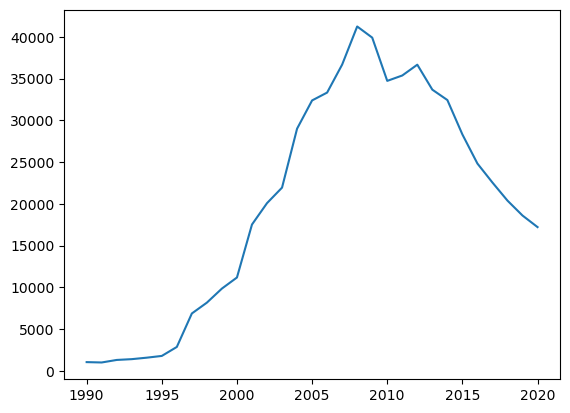

In [46]:
eq_guinea_df = gdp_df.query("Country == 'Equatorial Guinea'").sort_values('Year', ascending = True)
plt.plot(eq_guinea_df['Year'],eq_guinea_df['GDP_Per_Capita'])

plt.show()

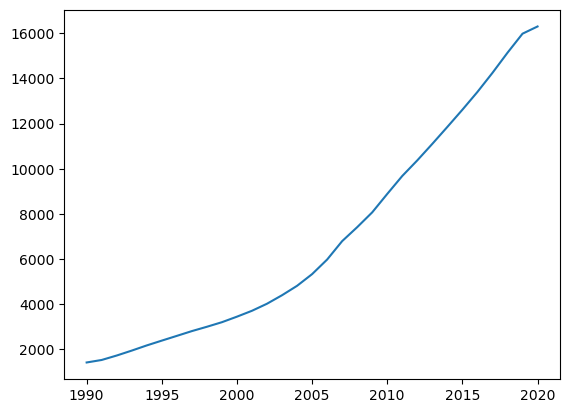

In [47]:
eq_guinea_df = gdp_df.query("Country == 'China'").sort_values('Year', ascending = True)
plt.plot(eq_guinea_df['Year'],eq_guinea_df['GDP_Per_Capita'])
plt.show()

In [48]:
continents = pd.read_csv('../data/continents.csv')

In [49]:
continents.head()

,Continent,Country
0,Asia,Afghanistan
1,Europe,Albania
2,Africa,Algeria
3,Europe,Andorra
4,Africa,Angola


In [56]:
gdp_df = gdp_df.merge(continents, how = 'inner')

In [57]:
gdp_df

,Country,Year,GDP_Per_Capita,Continent
0,Afghanistan,2020,1970.560169,Asia
1,Afghanistan,2019,2065.036235,Asia
2,Afghanistan,2018,2033.804389,Asia
3,Afghanistan,2017,2058.400221,Asia
4,Afghanistan,2016,2057.067978,Asia
...,...,...,...,...
5577,Zimbabwe,1994,2603.927369,Africa
5578,Zimbabwe,1993,2420.092791,Africa
5579,Zimbabwe,1992,2437.152908,Africa
5580,Zimbabwe,1991,2733.696626,Africa


In [62]:
gdp_df['Country'].nunique()

188

In [103]:
sum_country = gdp_df.groupby('Continent').nunique().reset_index()

In [104]:
sum_country

,Continent,Country,Year,GDP_Per_Capita
0,Africa,50,31,1485
1,Asia,42,31,1247
2,Europe,45,31,1316
3,North America,26,31,783
4,Oceania,14,31,410
5,South America,11,31,341


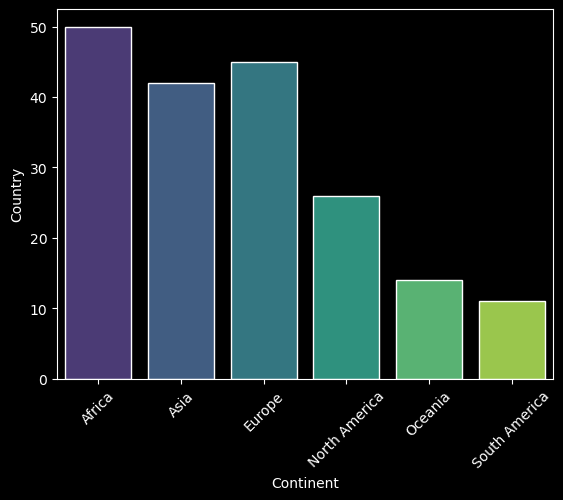

In [108]:
plt.style.use('dark_background')

sns.barplot(data = sum_country, x ='Continent',  y = 'Country', palette = 'viridis', edgecolor = 'white')
plt.xticks(rotation = 45, color ='white')
plt.show()

In [112]:
gdp_2018 = gdp_df.query('Year == 2018')
gdp_2018

,Country,Year,GDP_Per_Capita,Continent
2,Afghanistan,2018,2033.804389,Asia
21,Albania,2018,13317.092313,Europe
52,Algeria,2018,11630.679409,Africa
83,Angola,2018,6982.129420,Africa
114,Antigua and Barbuda,2018,21017.264500,North America
...,...,...,...,...
5433,Vanuatu,2018,3093.086718,Oceania
5464,Vietnam,2018,9548.700016,Asia
5495,West Bank and Gaza,2018,6318.210068,Asia
5522,Zambia,2018,3521.545978,Africa


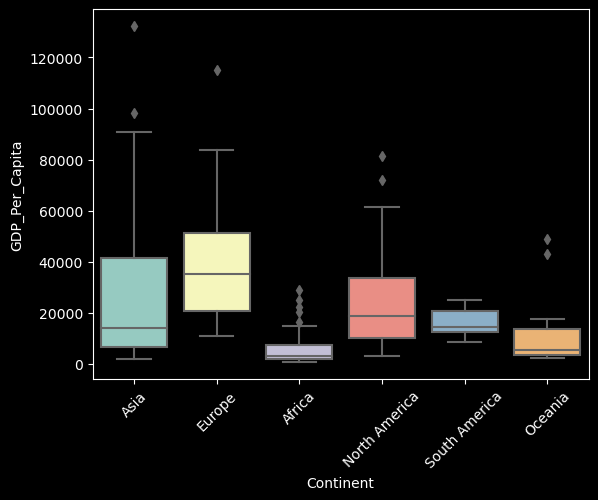

In [117]:
sns.boxplot(data = gdp_2018, x = 'Continent', y = 'GDP_Per_Capita')
plt.xticks(rotation = 45, color = 'white')
plt.show()

## Q20)
Few things I notice:
- Asia tends to have countries with a high GDP_Per_Capita
- African countries have the lowest GDP_Per_Capita overall
- South America is the only continent where countries all tend to have a similar GDP_Per_Capita where as with every other continent there is a wide range and/or outliers

In [125]:
Life_Expectancy = pd.read_csv('../data/life_expectancy.csv', skiprows=4)

In [126]:
Life_Expectancy.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,Unnamed: 67
0,Aruba,ABW,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,64.152000,64.537000,64.752000,65.132000,65.294000,65.502000,...,75.601000,75.683000,75.617000,75.903000,76.072000,76.248000,75.723000,74.626000,NaN,NaN
1,Africa Eastern and Southern,AFE,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,44.085552,44.386697,44.752182,44.913159,45.479043,45.498338,...,61.337917,61.856458,62.444050,62.922390,63.365863,63.755678,63.313860,62.454590,NaN,NaN
2,Afghanistan,AFG,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,32.535000,33.068000,33.547000,34.016000,34.494000,34.953000,...,62.545000,62.659000,63.136000,63.016000,63.081000,63.565000,62.575000,61.982000,NaN,NaN
3,Africa Western and Central,AFW,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,37.845152,38.164950,38.735102,39.063715,39.335360,39.618038,...,55.922229,56.195872,56.581678,56.888446,57.189139,57.555796,57.226373,56.988657,NaN,NaN
4,Angola,AGO,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,38.211000,37.267000,37.539000,37.824000,38.131000,38.495000,...,60.040000,60.655000,61.092000,61.680000,62.144000,62.448000,62.261000,61.643000,NaN,NaN
